In [3]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('./HR(已修改）.csv')

In [30]:
df.head()

Unnamed: 0  satisfaction_level  last_evaluation  number_project  \
0           0                0.38             0.53               2   
1           1                0.80             0.86               5   
2           2                0.11             0.88               7   
3           3                0.72             0.87               5   
4           4                0.37             0.52               2   

   average_monthly_hours  time_spend_company  Work_accident  left  \
0                    157                   3              0     1   
1                    262                   6              0     1   
2                    272                   4              0     1   
3                    223                   5              0     1   
4                    159                   3              0     1   

   promotion_last_5years department  salary  
0                      0      sales     low  
1                      0      sales  medium  
2                      0      sales  medium  
3                      0      sales     low  
4                      0      sales     low

In [15]:
dp_indices = df.groupby(by = 'department').indices

In [16]:
dp_indices#下面的sales就是对应的index

{'IT': array([   60,    61,    62, ..., 14931, 14932, 14937]),
 'RandD': array([  300,   301,   302,   303,   304,   452,   453,   454,   455,
          456,   604,   605,   606,   607,   608,   832,   833,   834,
          835,   836,   984,   985,   986,   987,   988,  1060,  1061,
         1062,  1063,  1064,  1216,  1217,  1218,  1290,  1291,  1292,
         1293,  1294,  1295,  1367,  1368,  1369,  1370,  1371,  1372,
         1444,  1445,  1446,  1447,  1448,  1449,  1521,  1522,  1523,
         1524,  1525,  1597,  1598,  1599,  1600,  1601,  1674,  1675,
         1676,  1677,  1678,  1750,  1751,  1752,  1753,  1754,  1826,
         1827,  1828,  1829,  1830,  1902,  1903,  1904,  1905,  1906,
         1978,  1979,  1980,  1981,  1982,  2054,  2055,  2056,  2057,
         2058,  2130,  2131,  2132,  2133,  2134,  2206,  2207,  2208,
         2209,  2210,  2282,  2283,  2284,  2285,  2286,  2358,  2359,
         2360,  2361,  2362,  2434,  2435,  2436,  2437,  2438,  2510,
     

In [31]:
sales_values = df['left'].iloc[dp_indices['sales']].values#iloc是提取数值的意思

In [50]:
sales_values

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
technical_values = df['left'].iloc[dp_indices['technical']].values

In [51]:
technical_values

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
ss.ttest_ind(sales_values,technical_values)[1]#T分布检验的p值 [1]是索引 只显示出p值

0.2813593499462283

In [71]:
dp_keys = list(dp_indices.keys())

In [72]:
dp_keys

['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [73]:
dp_t_mat = np.zeros([len(dp_keys),len(dp_keys)])#创建一个numpy.ndarray的0矩阵 后面填写了长和宽

In [77]:
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        f_values = df['left'].iloc[dp_indices[dp_keys[i]]].values
        g_balues = df['left'].iloc[dp_indices[dp_keys[j]]].values
        p_value = ss.ttest_ind(f_values,g_balues)[1]
        dp_t_mat[i][j] = p_value

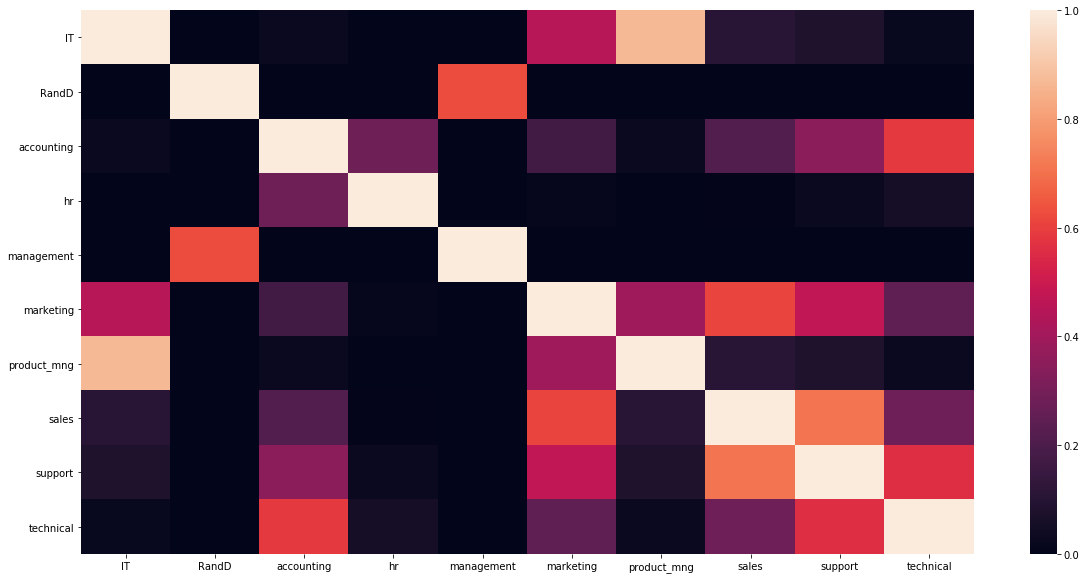

In [84]:
plt.figure(figsize = (20,10))
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)#越接近与0说明部门与部门之间的离职率是没有显著差异的

In [79]:
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        f_values = df['left'].iloc[dp_indices[dp_keys[i]]].values
        g_balues = df['left'].iloc[dp_indices[dp_keys[j]]].values
        p_value = ss.ttest_ind(f_values,g_balues)[1]
        if p_value<0.05:
            dp_t_mat[i][j] = -1
        else:
            dp_t_mat[i][j] = p_value
        dp_t_mat[i][j] = p_value

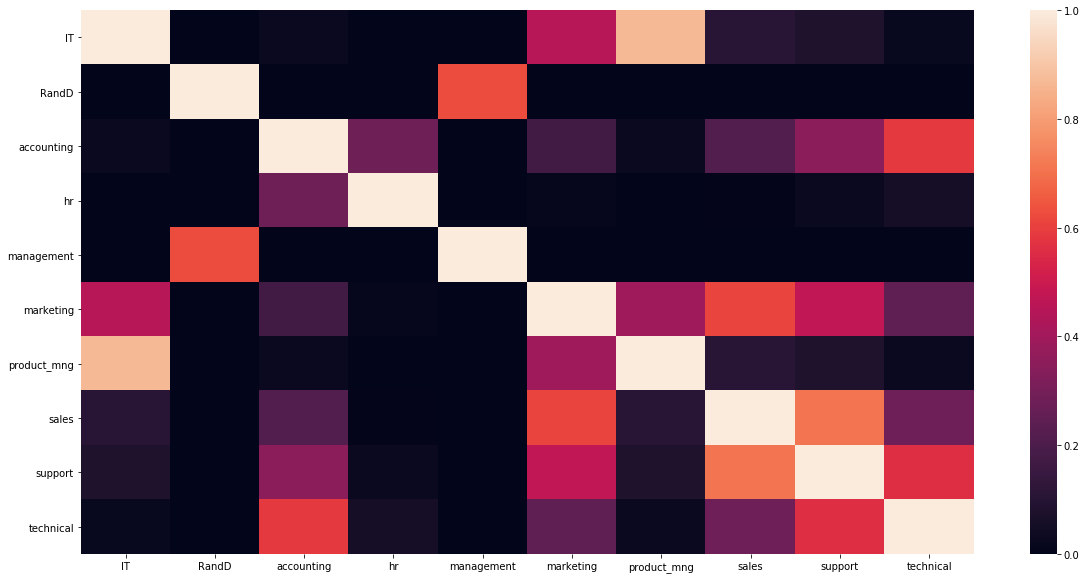

In [109]:
plt.figure(figsize = (20,10))
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)

# 通过透视表来进行交叉分析

In [88]:
piv_tb = pd.pivot_table(df,values = 'left',index = ['promotion_last_5years','salary'],
                       columns = ['Work_accident'],aggfunc = np.mean)#aggfunc是表示添加函数的

In [89]:
piv_tb

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331620  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256

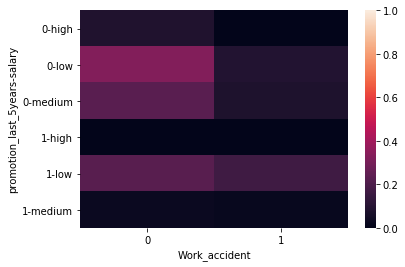

In [91]:
sns.heatmap(piv_tb,vmin = 0,vmax = 1)#指定最大值为1最小值为0 其中颜色越浅 离职率越高 要重点关注这一类人

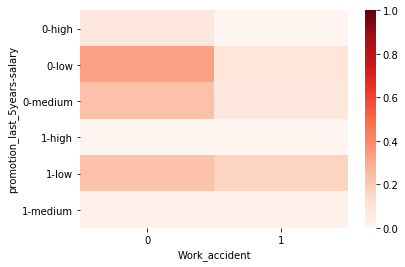

In [107]:
sns.set_context(font_scale = 1.5)#调整字体 放大到1.5倍
sns.heatmap(piv_tb,vmin = 0,vmax = 1,cmap = sns.color_palette('Reds',n_colors = 256))
#n_colors---> 颜色个数
#start ---> 值区间在0-3，开始颜色
#rot ---> 颜色旋转角度
#gamma ---> 颜色伽马值，越大颜色越暗
#dark,light ---> 值区间0-1，颜色越深
#reverse ---> 布尔值，默认为False，由浅到深